<a href="https://www.kaggle.com/code/rkmaurya93/hackathon-work?scriptVersionId=260100261" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('/kaggle/input/indian-soil-csv/indian_soil.csv')

In [3]:
df.head()

,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,Sandy,Cotton(Kapaas),897.077239,27.676966,False,True,Cloudy,122,6.555816
1,Clay,Rice(Chawal),992.673282,18.026142,True,True,Rainy,140,8.527341
2,Loam,Barley(Jau),147.998025,29.794042,False,False,Sunny,106,1.127443
3,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,Silt,Wheat(Gehu),730.379174,31.620687,True,True,Cloudy,110,7.248251


In [4]:
df['Yield_kg_per_hectare']=df['Yield_tons_per_hectare']*1000

In [5]:
df.head()

,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare,Yield_kg_per_hectare
0,Sandy,Cotton(Kapaas),897.077239,27.676966,False,True,Cloudy,122,6.555816,6555.816258
1,Clay,Rice(Chawal),992.673282,18.026142,True,True,Rainy,140,8.527341,8527.340906
2,Loam,Barley(Jau),147.998025,29.794042,False,False,Sunny,106,1.127443,1127.443336
3,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573,6517.572508
4,Silt,Wheat(Gehu),730.379174,31.620687,True,True,Cloudy,110,7.248251,7248.251218


In [6]:
df.drop('Yield_tons_per_hectare',inplace=True,axis=1)

In [7]:
df.head()

,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_kg_per_hectare
0,Sandy,Cotton(Kapaas),897.077239,27.676966,False,True,Cloudy,122,6555.816258
1,Clay,Rice(Chawal),992.673282,18.026142,True,True,Rainy,140,8527.340906
2,Loam,Barley(Jau),147.998025,29.794042,False,False,Sunny,106,1127.443336
3,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6517.572508
4,Silt,Wheat(Gehu),730.379174,31.620687,True,True,Cloudy,110,7248.251218


# Visualizing the columns with yield:

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

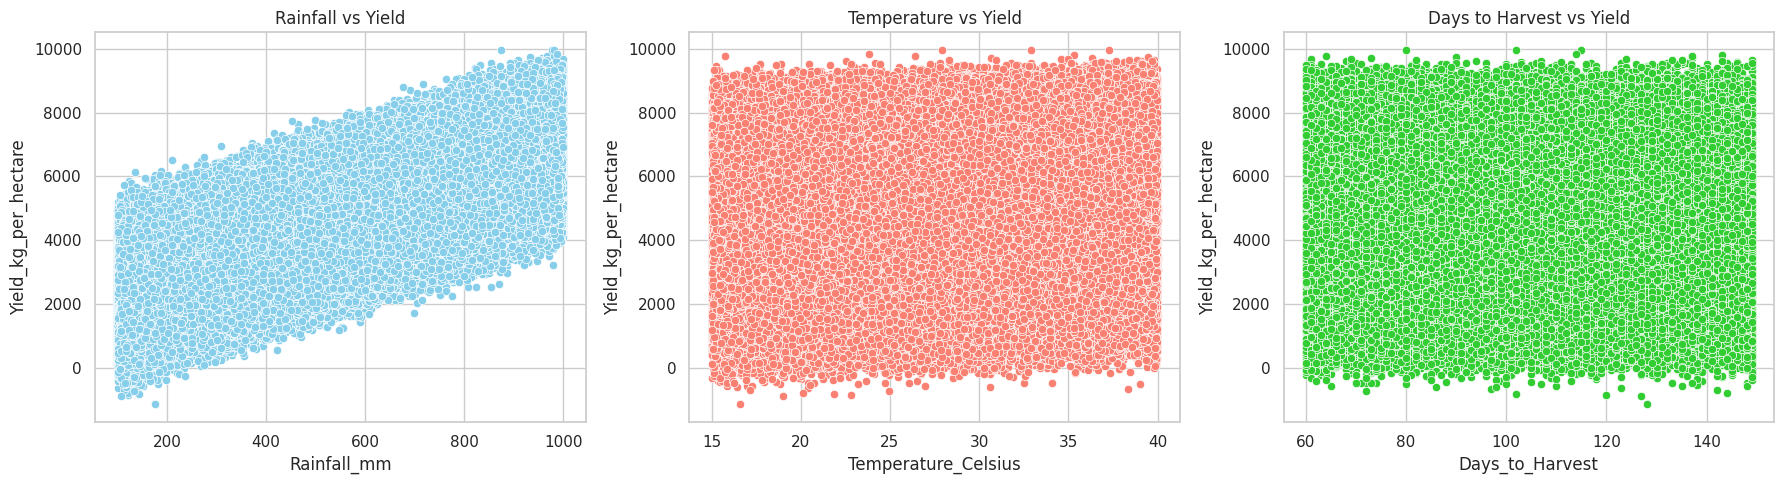

In [9]:
sns.set(style='whitegrid')

fig,axes=plt.subplots(1,3,figsize=(18,5))

sns.scatterplot(ax=axes[0], x='Rainfall_mm', y='Yield_kg_per_hectare', data=df, color='skyblue')
axes[0].set_title('Rainfall vs Yield')

# Temperature vs Yield
sns.scatterplot(ax=axes[1], x='Temperature_Celsius', y='Yield_kg_per_hectare', data=df, color='salmon')
axes[1].set_title('Temperature vs Yield')

# Days to Harvest vs Yield
sns.scatterplot(ax=axes[2], x='Days_to_Harvest', y='Yield_kg_per_hectare', data=df, color='limegreen')
axes[2].set_title('Days to Harvest vs Yield')

plt.tight_layout()
plt.show()

In [10]:
avg_yield_by_crop = df.groupby('Crop')['Yield_kg_per_hectare'].mean().sort_values(ascending=False)

print("Average Yield by Crop:")
print(avg_yield_by_crop)

Average Yield by Crop:
Crop
Soybean           4653.711610
Wheat(Gehu)       4652.740146
Cotton(Kapaas)    4650.840829
Rice(Chawal)      4650.760070
Barley(Jau)       4647.411502
Maize(Makka)      4641.387423
Name: Yield_kg_per_hectare, dtype: float64


In [11]:
avg_yield_by_soil = df.groupby('Soil_Type')['Yield_kg_per_hectare'].mean().sort_values(ascending=False)
print('average Yield by Soil')
print(avg_yield_by_soil)

average Yield by Soil
Soil_Type
Chalky    4652.894760
Peaty     4651.063300
Loam      4651.055723
Sandy     4648.510824
Silt      4648.413505
Clay      4644.890944
Name: Yield_kg_per_hectare, dtype: float64


# Encoding:
    

In [12]:
df['Fertilizer_Used'] = df['Fertilizer_Used'].astype(int)
df['Irrigation_Used'] = df['Irrigation_Used'].astype(int)

# Splitting the dataset:

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x=df.drop('Yield_kg_per_hectare',axis=1)
y=df['Yield_kg_per_hectare']

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [16]:
x_train.head()

,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest
566853,Sandy,Soybean,887.383906,33.050569,1,1,Cloudy,79
382311,Clay,Soybean,179.188444,24.699056,0,0,Rainy,88
241519,Silt,Wheat(Gehu),649.310754,30.057577,0,0,Cloudy,120
719220,Loam,Cotton(Kapaas),221.489100,19.508065,0,1,Cloudy,101
905718,Peaty,Rice(Chawal),737.016449,18.233438,1,0,Rainy,88


# Apply the TargeEncoding on X_train:

In [17]:
from category_encoders import TargetEncoder

encoder = TargetEncoder(cols=['Crop', 'Soil_Type', 'Weather_Condition'])
x_train_encoded = encoder.fit_transform(x_train,y_train)

In [18]:
x_test_encoded=encoder.transform(x_test)

In [19]:
x_train_encoded.head()

,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest
566853,4646.183755,4652.270992,887.383906,33.050569,1,1,4647.595913,79
382311,4645.534050,4652.270992,179.188444,24.699056,0,0,4648.528741,88
241519,4647.615596,4654.279238,649.310754,30.057577,0,0,4647.595913,120
719220,4654.119060,4649.385581,221.489100,19.508065,0,1,4647.595913,101
905718,4650.633810,4652.076261,737.016449,18.233438,1,0,4648.528741,88


In [20]:
x_test_encoded.head()

,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest
987231,4647.615596,4649.385581,714.854403,23.875872,0,0,4650.929376,120
79954,4650.043746,4649.385581,860.604672,23.070897,0,0,4648.528741,78
567130,4646.183755,4645.185638,802.081954,24.020125,1,1,4648.528741,140
500891,4650.043746,4649.385581,203.616909,16.895211,0,1,4650.929376,96
55399,4647.615596,4652.076261,510.528102,18.402903,0,1,4647.595913,65


# Training the Model:

In [21]:
from xgboost import XGBRegressor

In [22]:
# Train model
xgb_model = XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(x_train_encoded, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [23]:
from sklearn.metrics import mean_absolute_error,r2_score

In [24]:
# Predict
y_pred = xgb_model.predict(x_test_encoded)

# Evaluate
print("XGBoost MAE:", mean_absolute_error(y_test, y_pred))
print("XGBoost R²:", r2_score(y_test, y_pred))

XGBoost MAE: 400.2023608729301
XGBoost R²: 0.9127476929787884


In [25]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("XGBoost RMSE:", rmse)

XGBoost RMSE: 501.5413812410438


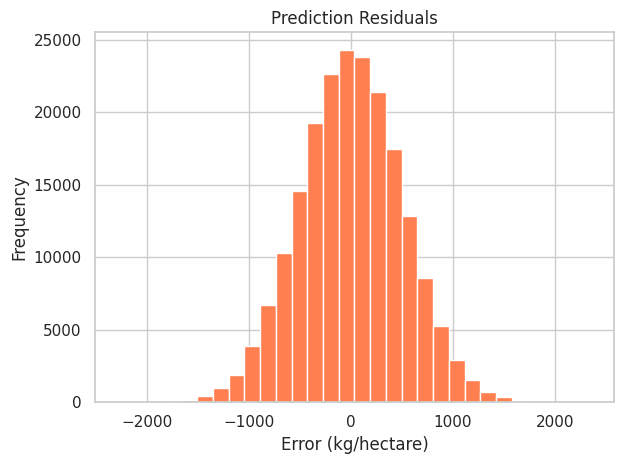

In [26]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred
plt.hist(residuals, bins=30, color='coral')
plt.title("Prediction Residuals")
plt.xlabel("Error (kg/hectare)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Converting the algorithms to the predictive model:

In [27]:
import joblib

# Save your trained model
joblib.dump(xgb_model, "xgb_yield_model.pkl")

# Save your fitted TargetEncoder
joblib.dump(encoder, "target_encoder.pkl")

['target_encoder.pkl']